## U-ROT and I-QFT with the same $\theta$`s (3 and 5 qibits examples)

This are the angles for the controlled-U gates:
Controlled-U 0 >>>  Rotation-angle: 2 π / 8
Controlled-U 1 >>>  Rotation-angle: 4 π / 8
Controlled-U 2 >>>  Rotation-angle: 8 π / 8
----------------------------------------------------------------------------------


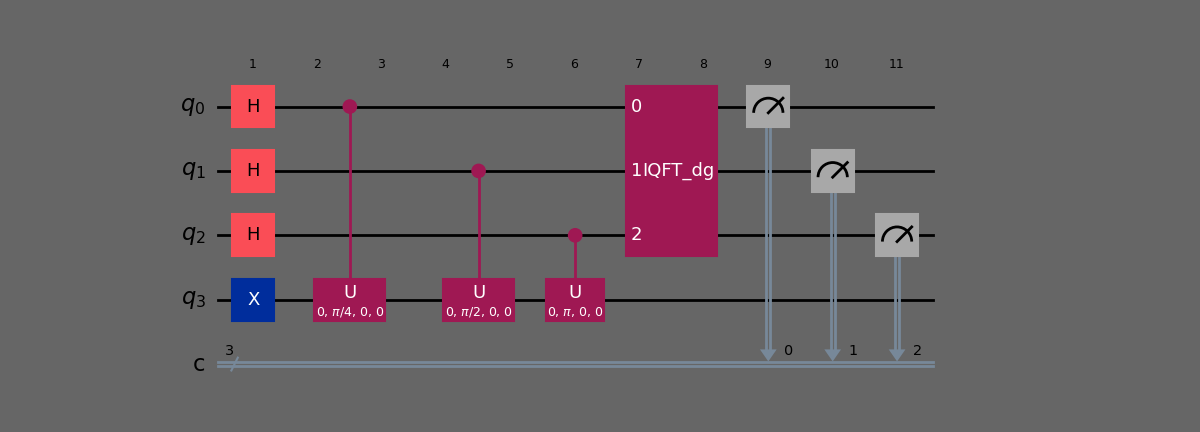

In [18]:
from qiskit import QuantumCircuit
import math
from qiskit.circuit.library import QFT

# importing the style for the circuit from local *.py file.
import sys
sys.path.append('C:/Users/Gustavo_Porcilio/ALGORITHMS/Doc_help')
from circuit_style import style

# Three qubits for the counting register and one 
#qubit for the eigenstate |psi>
nQubits = 4

qpe = QuantumCircuit(nQubits, nQubits-1)

# H-Gates to control qubits:
for qubit in range(nQubits-1):
    qpe.h(qubit)

# Eigenstate |psi>:
qpe.x(nQubits-1)

# Controlled-U angles (theta = 1/8) for qubits in descending order:
denominator = 8 # Using theta equal to the QFT inverse angle by default.
angle = 2*math.pi/denominator

# qpe.append(QFT(nQubits-1), range(nQubits-1))

print("This are the angles for the controlled-U gates:")
for control_qubit in range(nQubits-1):

    print("Controlled-U", control_qubit, ">>>  Rotation-angle:", 2**(control_qubit+1),  "\u03C0 /", denominator)
    qpe.cu(0, angle, 0, 0, control_qubit, nQubits-1);
    angle *= 2

print("----------------------------------------------------------------------------------")

qpe = qpe.compose(QFT(nQubits-1, inverse=True), range(nQubits-1))

for n in range(nQubits-1):
    qpe.measure(n,n)

qpe.draw(style=style, output="mpl")

{1: 1.0}
----------------------------------------------------------------
Binary Counts >>> {'001': 1.0}
----------------------------------------------------------------
Filtered Counts >>> {'001': 1.0}


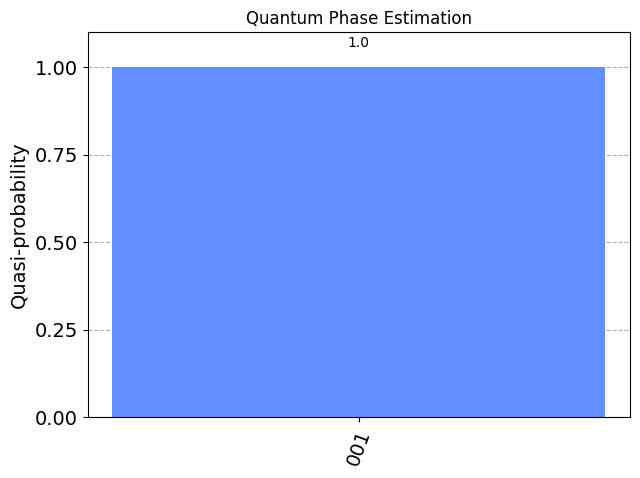

In [19]:
# Run a simulation with Sampler
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram

shots = 1024

# ***With a short line of code***
# Sampler().run(qc).result().quasi_dists[0]
sampler = Sampler()
job = sampler.run(qpe, shots=shots)

# Get the result
result = job.result()
probabilities = result.quasi_dists[0]

# Calculate the counts for each result
counts = {key: round(value * shots) for key, value in probabilities.items()}

print(probabilities)
print("----------------------------------------------------------------")

# Convert keys from decimal to binary
binary_key_counts = {format(key, '03b'): value for key, value in probabilities.items()}

# Filter out keys with a count less than 0.005 for better visibility
filtered_counts = {key: value for key, value in binary_key_counts.items() if value >= 0.000001}

print("Binary Counts >>>", binary_key_counts)
print("----------------------------------------------------------------")
print("Filtered Counts >>>", filtered_counts)

# Plot the results
plot_histogram(filtered_counts, title="Quantum Phase Estimation")

These measurements in `|001>` (decimal 1), is telling us that the $\theta$ probabilitie is 100%, like the true value of $\theta$ = $\frac{1}{8}$ = 0,125

$$
 \text{  Estimated phase  }\; \theta = \frac{1}{2^3} = 0,125
$$

This are the angles for the controlled-U gates:
Controlled-U 0 >>>  Rotation-angle: 2 π / 32
Controlled-U 1 >>>  Rotation-angle: 4 π / 32
Controlled-U 2 >>>  Rotation-angle: 8 π / 32
Controlled-U 3 >>>  Rotation-angle: 16 π / 32
Controlled-U 4 >>>  Rotation-angle: 32 π / 32
----------------------------------------------------------------------------------


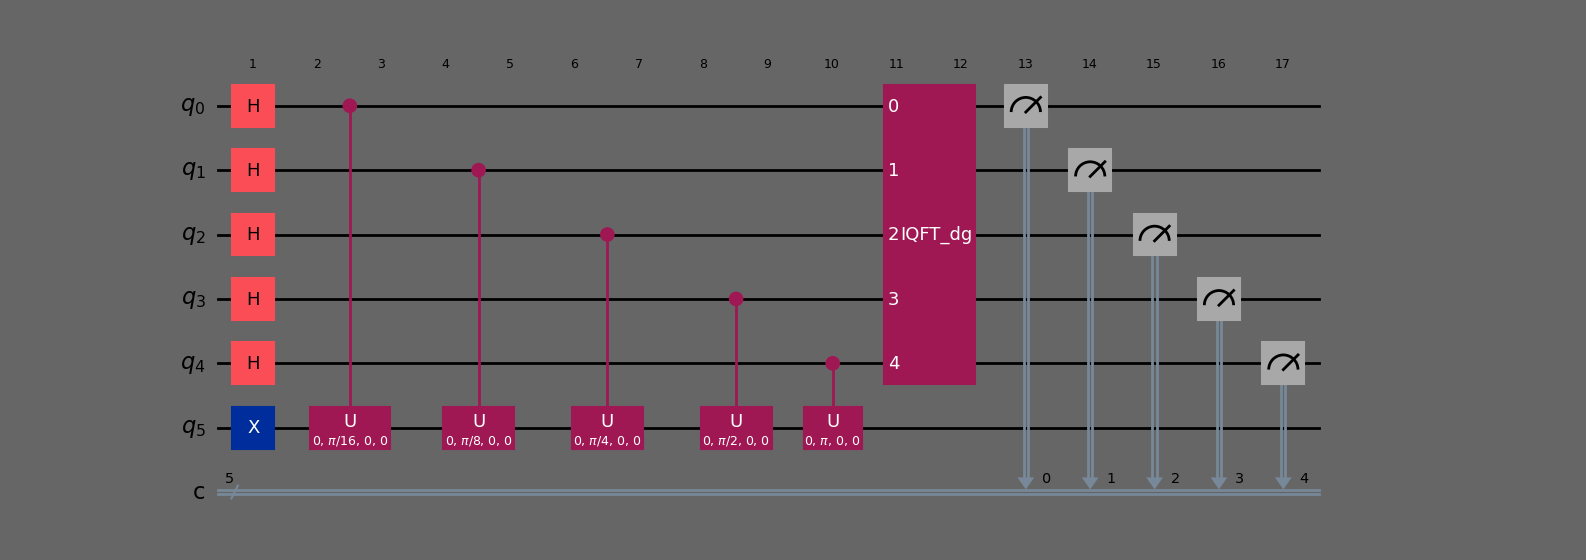

In [13]:
from qiskit import QuantumCircuit
import math
from qiskit.circuit.library import QFT

# importing the style for the circuit from local *.py file.
import sys
sys.path.append('C:/Users/Gustavo_Porcilio/ALGORITHMS/Doc_help')
from circuit_style import style

# Five qubits for the counting register and one 
#qubit for the eigenstate |psi>
nQubits = 6

qpe = QuantumCircuit(nQubits, nQubits-1)

# H-Gates to control qubits:
for qubit in range(nQubits-1):
    qpe.h(qubit)

# Eigenstate |psi>:
qpe.x(nQubits-1)

# Controlled-U angles (theta = 1/32) for qubits in descending order:
denominator = 32 # Using theta equal to the QFT-inverse angle by default.
angle = 2*math.pi/denominator

# qpe.append(QFT(nQubits-1), range(nQubits-1))

print("This are the angles for the controlled-U gates:")
for control_qubit in range(nQubits-1):

    print("Controlled-U", control_qubit, ">>>  Rotation-angle:", 2**(control_qubit+1),  "\u03C0 /", denominator)
    qpe.cu(0, angle, 0, 0, control_qubit, nQubits-1);
    angle *= 2

print("----------------------------------------------------------------------------------")

qpe = qpe.compose(QFT(nQubits-1, inverse=True), range(nQubits-1))

for n in range(nQubits-1):
    qpe.measure(n,n)

qpe.draw(style=style, output="mpl")

- These are all angles phases inside the I-QFT black box. Those are the same as what the UC`s gates have to turn around z-axis.-

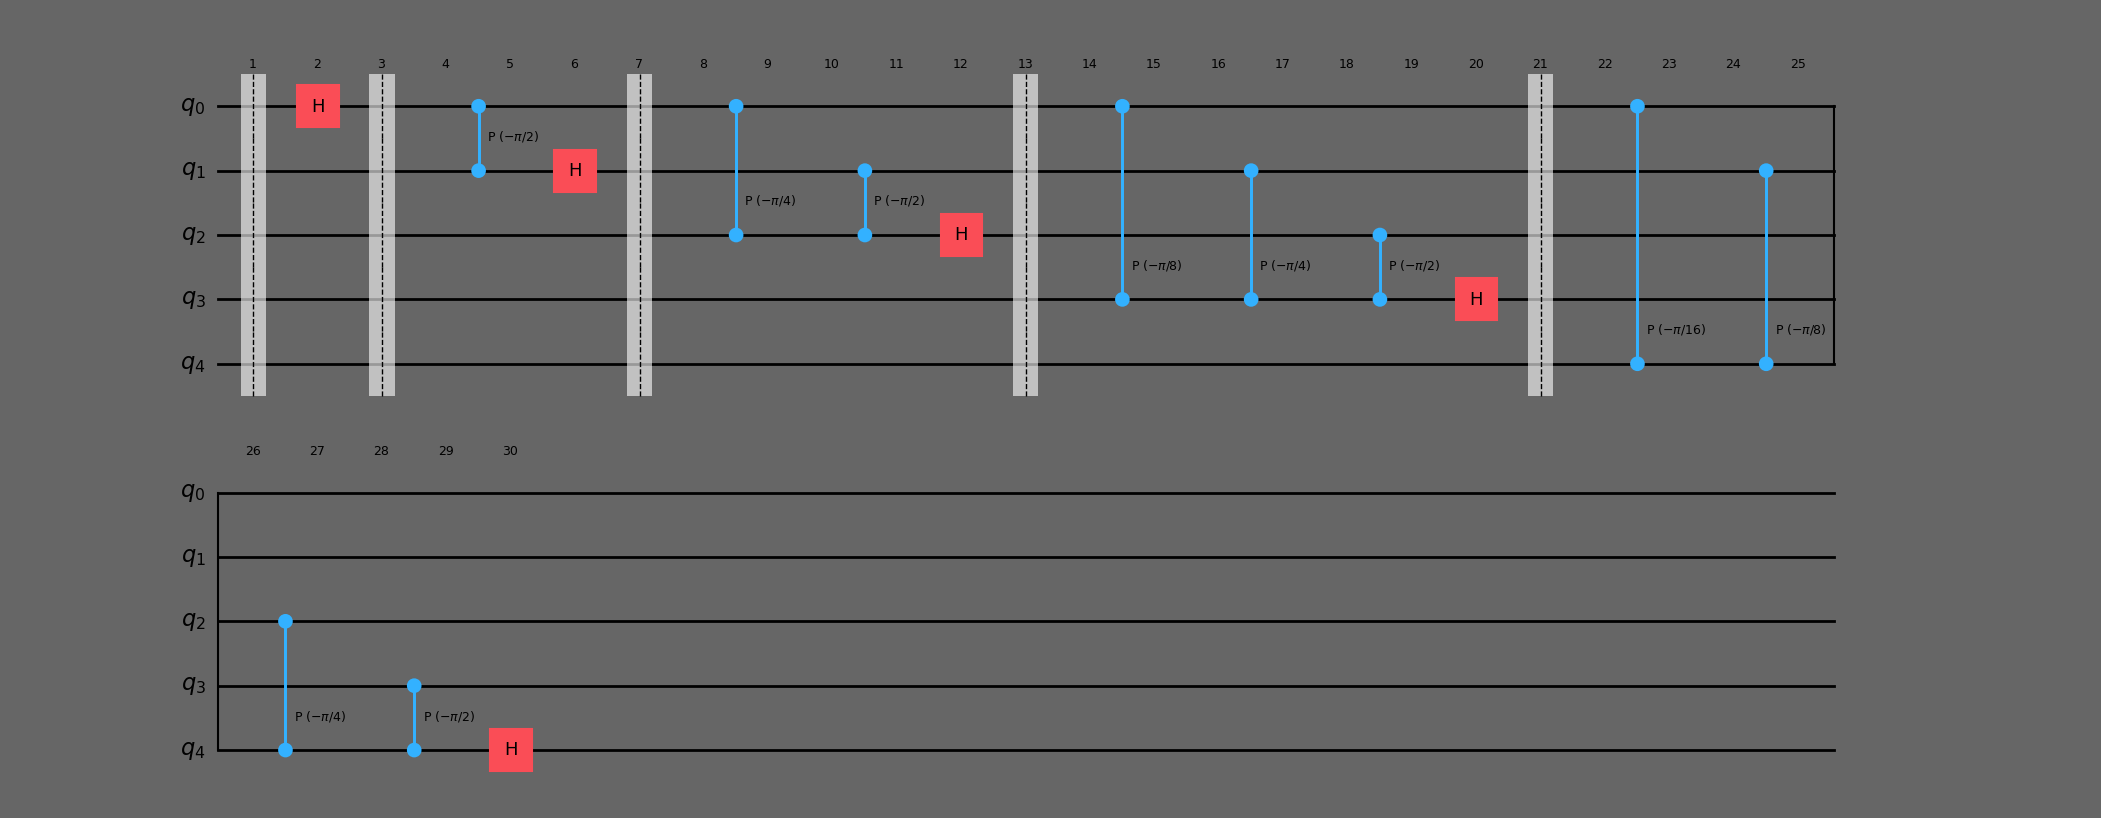

In [21]:
qi = QuantumCircuit(5)
qi = QFT(5, insert_barriers=True, do_swaps=False).inverse()
qi.decompose().draw(style=style, output="mpl")

{1: 1.0}
----------------------------------------------------------------
Binary Counts >>> {'00001': 1.0}
----------------------------------------------------------------
Filtered Counts >>> {'00001': 1.0}


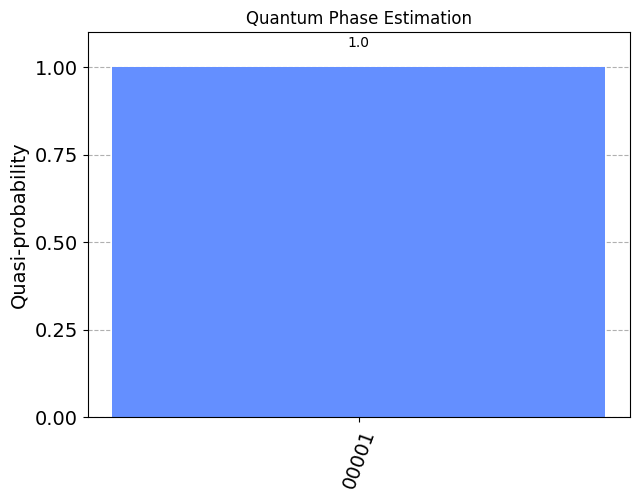

In [14]:
# Run a simulation with Sampler
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram

shots = 1024

# ***With a short line of code***
# Sampler().run(qc).result().quasi_dists[0]
sampler = Sampler()
job = sampler.run(qpe, shots=shots)

# Get the result
result = job.result()
probabilities = result.quasi_dists[0]

# Calculate the counts for each result
counts = {key: round(value * shots) for key, value in probabilities.items()}

print(probabilities)
print("----------------------------------------------------------------")

# Convert keys from decimal to binary
binary_key_counts = {format(key, '05b'): value for key, value in probabilities.items()}

# Filter out keys with a count less than 0.005 for better visibility
filtered_counts = {key: value for key, value in binary_key_counts.items() if value >= 0.000001}

print("Binary Counts >>>", binary_key_counts)
print("----------------------------------------------------------------")
print("Filtered Counts >>>", filtered_counts)

# Plot the results
plot_histogram(filtered_counts, title="Quantum Phase Estimation")

These measurements in `|00001>` (decimal 1), is telling us that the $\theta$ probabilitie is 100%, like the true value of $\theta$ = $\frac{1}{32}$ = 0,03125

$$
 \text{  Estimated phase  }\; \theta = \frac{1}{2^5} = 0,03125
$$

### If I increase the U-ROT angle a little, the probability at `|00001>` decreases and spreads to other possible combinations.

 - The next step is increasing the amount of control qubit to get a higher probability in just one qubits conbination (maybe in another combination, cuz the control qubits amount changes).

This gives us a hint between $\theta$ angle differences and the amount of control qubits used in the algorithm.

This are the angles for the controlled-U gates:
Controlled-U 0 >>>  Rotation-angle: 2 π / 30
Controlled-U 1 >>>  Rotation-angle: 4 π / 30
Controlled-U 2 >>>  Rotation-angle: 8 π / 30
Controlled-U 3 >>>  Rotation-angle: 16 π / 30
Controlled-U 4 >>>  Rotation-angle: 32 π / 30
Controlled-U 5 >>>  Rotation-angle: 64 π / 30
Controlled-U 6 >>>  Rotation-angle: 128 π / 30
Controlled-U 7 >>>  Rotation-angle: 256 π / 30
Controlled-U 8 >>>  Rotation-angle: 512 π / 30
----------------------------------------------------------------------------------


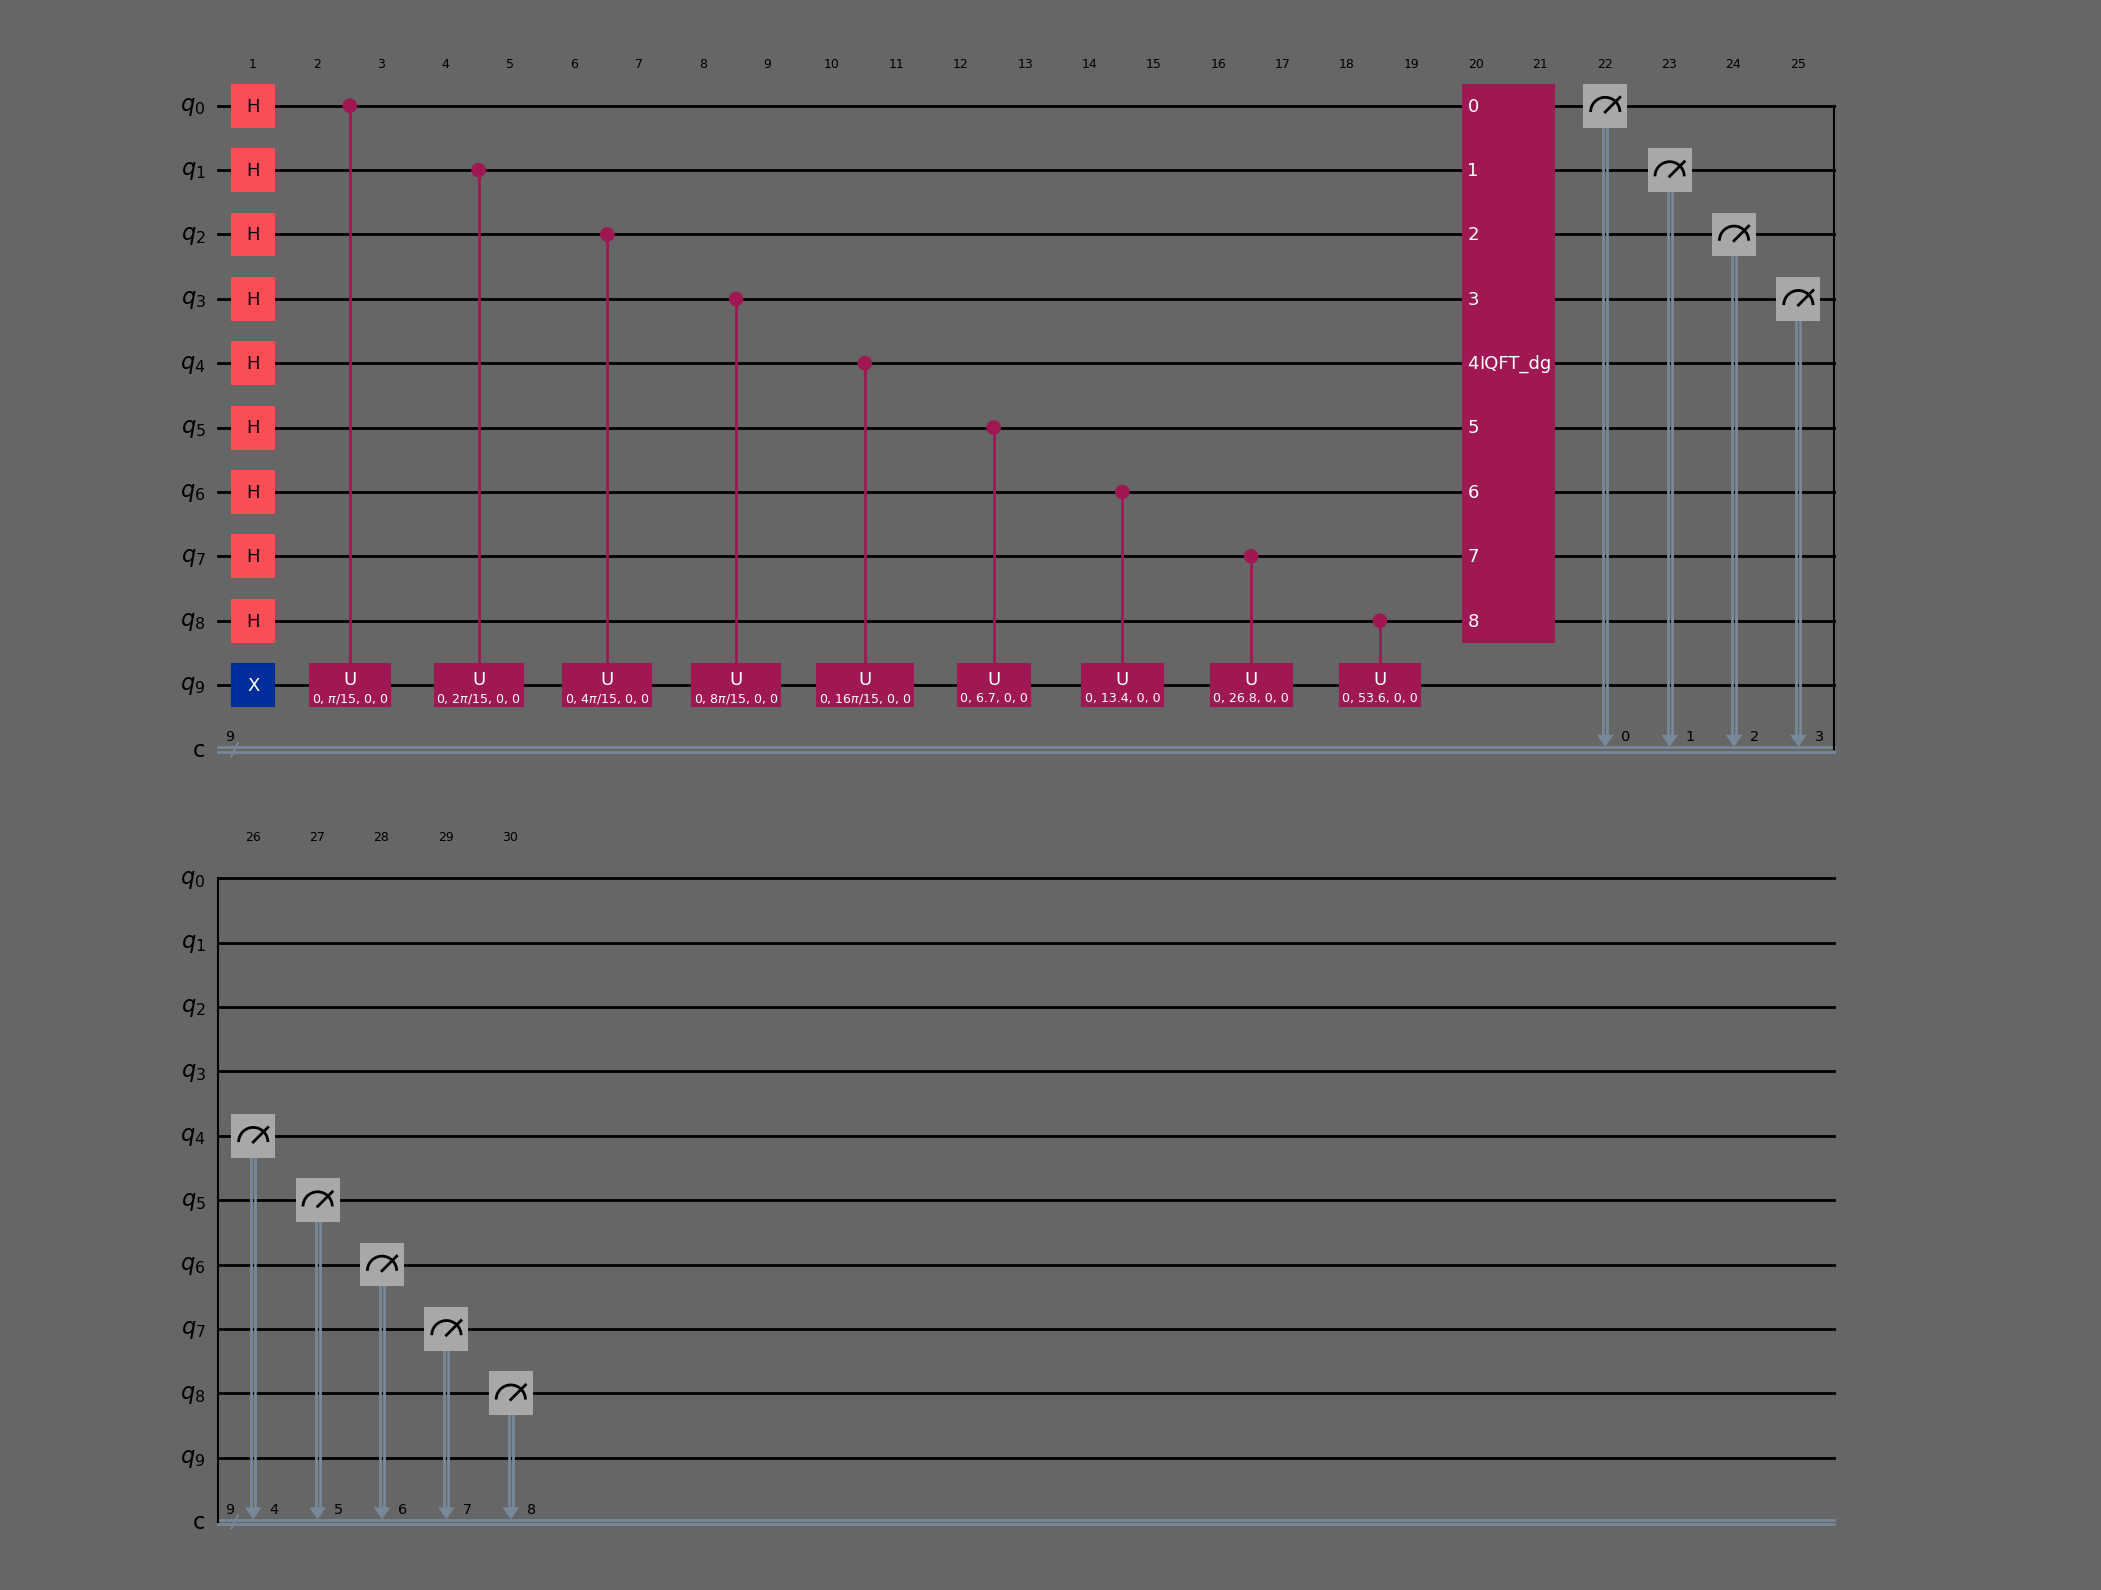

In [32]:
from qiskit import QuantumCircuit
import math
from qiskit.circuit.library import QFT

# importing the style for the circuit from local *.py file.
import sys
sys.path.append('C:/Users/Gustavo_Porcilio/ALGORITHMS/Doc_help')
from circuit_style import style

# Five qubits for the counting register and one 
#qubit for the eigenstate |psi>
nQubits = 10

qpe = QuantumCircuit(nQubits, nQubits-1)

# H-Gates to control qubits:
for qubit in range(nQubits-1):
    qpe.h(qubit)

# Eigenstate |psi>:
qpe.x(nQubits-1)

# Controlled-U angles (theta = 1/32) for qubits in descending order:
denominator = 30 # increasing theta to 1/30.
angle = 2*math.pi/denominator

# qpe.append(QFT(nQubits-1), range(nQubits-1))

print("This are the angles for the controlled-U gates:")
for control_qubit in range(nQubits-1):

    print("Controlled-U", control_qubit, ">>>  Rotation-angle:", 2**(control_qubit+1),  "\u03C0 /", denominator)
    qpe.cu(0, angle, 0, 0, control_qubit, nQubits-1);
    angle *= 2

print("----------------------------------------------------------------------------------")

qpe = qpe.compose(QFT(nQubits-1, inverse=True), range(nQubits-1))

for n in range(nQubits-1):
    qpe.measure(n,n)

qpe.draw(style=style, output="mpl")

{13: 0.0009765625, 14: 0.0009765625, 15: 0.0009765625, 16: 0.001953125, 17: 0.984375, 18: 0.0048828125, 20: 0.001953125, 22: 0.0009765625, 26: 0.0009765625, 39: 0.0009765625, 498: 0.0009765625}
----------------------------------------------------------------
Binary Counts >>> {'00001101': 0.0009765625, '00001110': 0.0009765625, '00001111': 0.0009765625, '00010000': 0.001953125, '00010001': 0.984375, '00010010': 0.0048828125, '00010100': 0.001953125, '00010110': 0.0009765625, '00011010': 0.0009765625, '00100111': 0.0009765625, '111110010': 0.0009765625}
----------------------------------------------------------------
Filtered Counts >>> {'00001101': 0.0009765625, '00001110': 0.0009765625, '00001111': 0.0009765625, '00010000': 0.001953125, '00010001': 0.984375, '00010010': 0.0048828125, '00010100': 0.001953125, '00010110': 0.0009765625, '00011010': 0.0009765625, '00100111': 0.0009765625, '111110010': 0.0009765625}


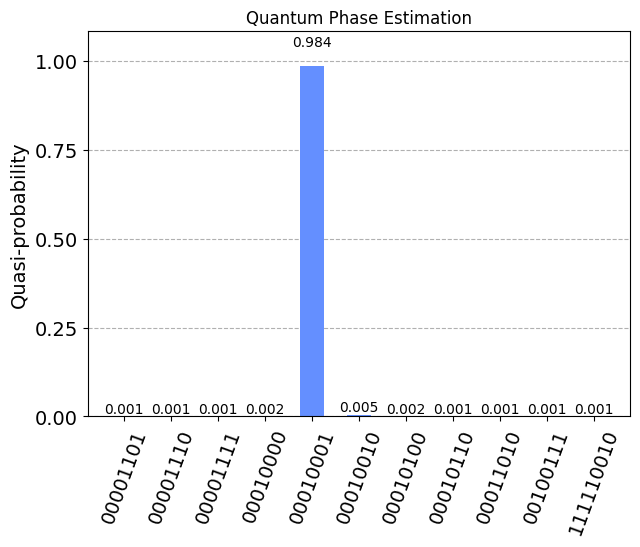

In [33]:
# Run a simulation with Sampler
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram

shots = 1024

# ***With a short line of code***
# Sampler().run(qc).result().quasi_dists[0]
sampler = Sampler()
job = sampler.run(qpe, shots=shots)

# Get the result
result = job.result()
probabilities = result.quasi_dists[0]

# Calculate the counts for each result
counts = {key: round(value * shots) for key, value in probabilities.items()}

print(probabilities)
print("----------------------------------------------------------------")

# Convert keys from decimal to binary
binary_key_counts = {format(key, '08b'): value for key, value in probabilities.items()}

# Filter out keys with a count less than 0.005 for better visibility
filtered_counts = {key: value for key, value in binary_key_counts.items() if value >= 0.000001}

print("Binary Counts >>>", binary_key_counts)
print("----------------------------------------------------------------")
print("Filtered Counts >>>", filtered_counts)

# Plot the results
plot_histogram(filtered_counts, title="Quantum Phase Estimation")

In [23]:
import qiskit_ibm_runtime
qiskit_ibm_runtime.version.get_version_info()

'0.23.0'